In [12]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [14]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
import pandas as pd

print(mnist.data)
print(mnist.target)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [16]:
data = pd.DataFrame(mnist.data, columns=mnist.feature_names)
target = pd.Series(mnist.target, name='target')

df = pd.concat([data, target], axis=1)

print(df.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  target  
0       0.0       0.

In [17]:
import numpy as np

jumlah_data = df['target'].value_counts()
print(jumlah_data)
print(np.mean(jumlah_data))
print(np.median(jumlah_data))

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: target, dtype: int64
7000.0
6930.5


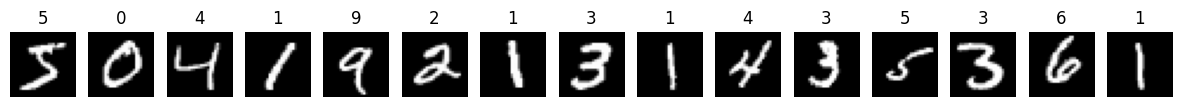

In [18]:
import matplotlib.pyplot as plt

data_array = mnist.data.to_numpy()
gambar = data_array[0:15]
label = df['target'][0:15]

fig, ax = plt.subplots(1, 15, figsize=(15, 1))
for i in range(15):
    gambar_i = gambar[i].reshape(28,28)
    ax[i].imshow(gambar_i, cmap='gray')
    ax[i].set_title(label[i])
    ax[i].axis('off')
plt.show()

In [19]:
fitur = pd.DataFrame(mnist.data, columns=mnist.feature_names)
label = pd.Series(mnist.target, name='target')

In [20]:
from sklearn.model_selection import train_test_split

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(fitur, label, train_size = 0.7, test_size = 0.3, random_state = 100)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(fitur, label, train_size = 0.8, test_size = 0.2, random_state = 100)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(fitur, label, train_size = 0.9, test_size = 0.1, random_state = 100)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
pca = RandomizedPCA(n_components=120, whiten=True, random_state=70)
svc = svm.SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

param_grid = {'svc__C': [0.1, 0.5, 1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
xtrain_subset = xtrain1.iloc[:1000]
ytrain_subset = ytrain1.iloc[:1000]

grid = GridSearchCV(model, param_grid)
grid.fit(xtrain_subset, ytrain_subset)

%time grid.fit(xtrain_subset, ytrain_subset)
print(grid.best_params_)
print(grid.best_score_)

# hasil terbaik sejauh ini adalah dengan menggunakan 120 komponen fitur dengan 70 random state pada reduksi

CPU times: user 50.2 s, sys: 37.7 s, total: 1min 27s
Wall time: 54 s
{'svc__C': 5, 'svc__gamma': 0.005}
0.8800000000000001


In [22]:
model1 = grid.best_estimator_
model2 = grid.best_estimator_
model3 = grid.best_estimator_

model1.fit(xtrain1, ytrain1)
model2.fit(xtrain2, ytrain2)
model3.fit(xtrain3, ytrain3)

Pipeline(steps=[('pca', PCA(n_components=120, random_state=70, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.005))])

In [23]:
yPredTrain1 = model1.predict(xtrain1)
yPredTrain2 = model2.predict(xtrain2)
yPredTrain3 = model3.predict(xtrain3)

yfit1 = model1.predict(xtest1)
yfit2 = model2.predict(xtest2)
yfit3 = model3.predict(xtest3)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [25]:
accTrainSVM1 = accuracy_score(ytrain1, yPredTrain1)
accTrainSVM2 = accuracy_score(ytrain2, yPredTrain2)
accTrainSVM3 = accuracy_score(ytrain3, yPredTrain3)

accTestSVM1 = accuracy_score(ytest1, yfit1)
accTestSVM2 = accuracy_score(ytest2, yfit2)
accTestSVM3 = accuracy_score(ytest3, yfit3)

print(f'Hasil akurasi data train rasio 7:3= {accTrainSVM1}')
print(f'Hasil akurasi data train rasio 8:2= {accTrainSVM2}')
print(f'Hasil akurasi data train rasio 9:1= {accTrainSVM3}\n')
print(f'Hasil akurasi data test rasio 7:3= {accTestSVM1}')
print(f'Hasil akurasi data test rasio 8:2= {accTestSVM2}')
print(f'Hasil akurasi data test rasio 9:1= {accTestSVM3}')

Hasil akurasi data train rasio 7:3= 0.9994285714285714
Hasil akurasi data train rasio 8:2= 0.9994285714285714
Hasil akurasi data train rasio 9:1= 0.9994285714285714

Hasil akurasi data test rasio 7:3= 0.9944285714285714
Hasil akurasi data test rasio 8:2= 0.9919285714285714
Hasil akurasi data test rasio 9:1= 0.9844285714285714


In [26]:
print('classification report 1')
print(classification_report(ytest1, yfit1))

classification report 1
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2035
           1       1.00      1.00      1.00      2379
           2       0.99      0.99      0.99      2104
           3       0.99      0.99      0.99      2193
           4       0.99      0.99      0.99      2104
           5       0.99      0.99      0.99      1860
           6       1.00      1.00      1.00      2094
           7       0.99      0.99      0.99      2155
           8       0.99      1.00      1.00      2004
           9       1.00      0.99      0.99      2072

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000



In [27]:
print('classification report 2')
print(classification_report(ytest2, yfit2))

classification report 2
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.99      1.00      1.00      1587
           2       0.99      0.99      0.99      1420
           3       0.99      0.99      0.99      1492
           4       0.99      0.99      0.99      1390
           5       0.99      0.99      0.99      1239
           6       0.99      1.00      0.99      1373
           7       0.99      0.99      0.99      1412
           8       0.99      0.99      0.99      1323
           9       0.99      0.99      0.99      1408

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [28]:
print('classification report 3')
print(classification_report(ytest3, yfit3))

classification report 3
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       701
           1       0.99      0.99      0.99       792
           2       0.98      0.98      0.98       713
           3       0.98      0.98      0.98       715
           4       0.98      0.98      0.98       698
           5       0.99      0.98      0.98       630
           6       0.99      0.99      0.99       690
           7       0.98      0.98      0.98       724
           8       0.98      0.99      0.99       639
           9       0.99      0.97      0.98       698

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000



Confussion Matrix 1 :



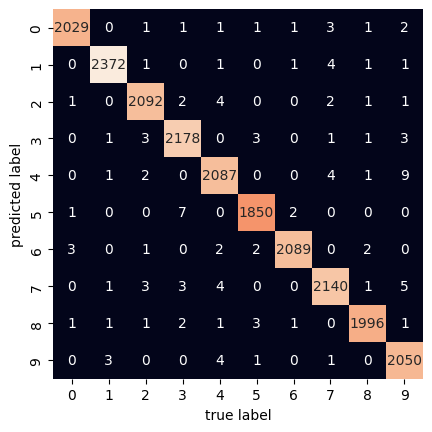

In [29]:
print('Confussion Matrix 1 :\n')
mat = confusion_matrix(ytest1, yfit1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Confussion Matrix 2 :



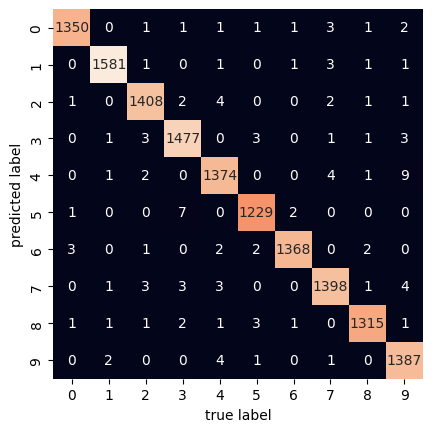

In [30]:
print('Confussion Matrix 2 :\n')
mat = confusion_matrix(ytest2, yfit2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Confussion Matrix 3 :



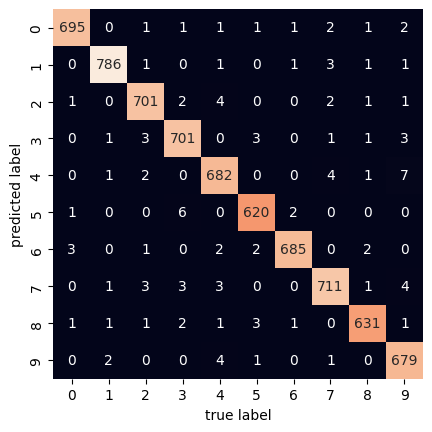

In [31]:
print('Confussion Matrix 3 :\n')
mat = confusion_matrix(ytest3, yfit3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()